In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,precision_score,confusion_matrix,f1_score,recall_score,ConfusionMatrixDisplay)

data=pd.read_csv("CVD.csv")
data


,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,Diabetes,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12.0,No
1,Very Good,Within the past year,No,No,No,No,Diabetes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4.0,Yes
2,Very Good,Within the past year,Yes,No,No,No,Diabetes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16.0,No
3,Poor,Within the past year,Yes,No,No,No,Diabetes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8.0,Yes
4,Good,Within the past year,No,No,No,No,Diabetes,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66127,Very Good,Within the past year,Yes,No,No,No,No,No,Female,30-34,155,58.97,24.56,No,4,60,30,3.0,No
66128,Good,Within the past year,Yes,No,No,Yes,Yes,Yes,Male,80+,175,98.88,32.19,Yes,0,4,20,28.0,No
66129,Very Good,Within the past year,Yes,No,No,Yes,No,No,Female,30-34,157,63.50,25.61,Yes,0,2,1,2.0,No
66130,Fair,Within the past year,Yes,No,No,Yes,No,No,Male,65-69,173,53.52,17.94,Yes,4,30,20,0.0,No


In [26]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,66132.000000,66132.000000,66132.000000,66132.000000,66132.000000,66132.000000,66131.000000
mean,170.369171,82.262552,28.253261,5.195155,30.165986,15.934525,6.122182
std,10.757593,20.972932,6.426734,8.313011,25.087554,15.531583,8.525821
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.850000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,79.380000,27.260000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.320000,7.000000,30.000000,24.000000,8.000000
max,234.000000,272.610000,98.440000,30.000000,120.000000,120.000000,120.000000


In [27]:
counts=data['General_Health'].value_counts
print(counts)

<bound method IndexOpsMixin.value_counts of 0             Poor
1        Very Good
2        Very Good
3             Poor
4             Good
           ...    
66127    Very Good
66128         Good
66129    Very Good
66130         Fair
66131         Fair
Name: General_Health, Length: 66132, dtype: object>


In [28]:
cols=['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History']
data[cols]=data[cols].replace({'Yes': 1,'No': 0})

data['Sex']=data['Sex'].replace({'Male': 1,'Female': 0})

data['General_Health']=data['General_Health'].replace({'Poor': 0,'Very Good':3,'Fair': 1,'Good': 2,'Excellent': 4})
data['Diabetes']=data['Diabetes'].replace({'Yes': 1,'No': 0,'No, pre-diabetes or borderline diabetes': 0,'Diabetes': 1,'Yes, but female told only during pregnancy': 0})
data.drop('Checkup',axis=1,inplace=True)
data.drop('Age_Category',axis=1,inplace=True)
data.head()

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,0,0,0,0,1,1,0,150,32.66,14.54,1,0,30,16,12.0,0.0
1,3,0,0,0,0,1,0,0,165,77.11,28.29,0,0,30,0,4.0,1.0
2,3,1,0,0,0,1,0,0,163,88.45,33.47,0,4,12,3,16.0,0.0
3,0,1,0,0,0,1,0,1,180,93.44,28.73,0,0,30,30,8.0,1.0
4,2,0,0,0,0,1,0,1,191,88.45,24.37,1,0,8,4,0.0,0.0


In [29]:
#identifying the null values in the dataset
print(data[data.isnull().any(axis=1)])
data=data.drop(data.index[66131])
print(data.isnull().sum().sum())




       General_Health  Exercise  Skin_Cancer  Other_Cancer  Depression  \
66131               1         1            0             0           0   

       Diabetes  Arthritis  Sex  Height_(cm)  Weight_(kg)    BMI  \
66131         0          0    1          178       100.24  31.71   

       Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
66131                1                    0                  2   

       Green_Vegetables_Consumption  FriedPotato_Consumption  Heart_Disease  
66131                             4                      NaN            NaN  
0


In [30]:
#Training and splitting of data
feature_column=['General_Health','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Height_(cm)','Weight_(kg)','BMI','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
X=data[feature_column]
y=data['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)



In [32]:
#choosing appropriate model
#using Naive bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy_naive = accuracy_score(y_pred, y_test)
print("Accuracy for naive bayes model:",accuracy_naive)
precision = precision_score(y_pred, y_test)
print("Precision for naive bayes model:",precision)
f1_score = f1_score(y_pred, y_test)
print("f1 score for naive bayes model:",f1_score)
recall_score = recall_score(y_pred, y_test)
print("Recall score for naive bayes model:",recall)

Accuracy for naive bayes model: 0.8535557184750733
Precision for the Naive Bayes model :  0.22594289742685936
f1 score for the Naive Bayes model :  0.286288521661456
Recall score for the Naive Bayes model :  0.39061547836684946


In [39]:
def predict_cvd():
  General_Health=int(input("Enter your general health Condition:"))
  Exercise=int(input("Enter 1 if you do Exercise else 0 : "))
  Skin_Cancer=int(input("Enter 1 if have Skin Cancer else 0 : "))
  Other_Cancer=int(input("Enter 1 if have other type of cancer or 0: "))
  Depression=int(input("Enter 1 if have Depression else 0 : "))
  Diabetes=int(input("Enter 1 if have Diabetes else 0 : "))
  Arthritis=int(input("Enter 1 if have Arthritis else 0 : "))
  Sex=int(input("if male enter 1 or female 0 : "))
  Height=int(input("Enter your height: "))
  Weight=int(input("Enter your weight: "))
  bmi=Weight/((Height/100)*(Height/100))
  print("Your BMI value is: ",bmi)
  BMI=float(input("Enter the BMI value shown above: "))
  Smoking_History=int(input("If you have smoking habbit enter 1 else 0: "))
  Alcohol_Consumption=int(input("Enter your alcohol consumption amount per day :"))
  Fruit_Consumption=int(input("Enter the number of fruits consumed: "))
  Green_Vegetables_Consumption=int(input("Enter the number of vegetables consumed: "))
  FriedPotato_Consumption=int(input("Enter the number of fried potatoes consumed: "))
  print("*********************RESULT*************************")
  input_data = [[General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption]]
  predicted = model1.predict(input_data)
  predicted_proba = model1.predict_proba(input_data)[:, 1]

    # Print prediction result
  if predicted[0] == 1:
        print("Prediction: High risk of CVD")
  else:
        print("Prediction: Low risk of CVD")

    # Optionally, print predicted probability
  print()
  print(f"Probability of CVD: {predicted_proba[0]:.2f}")
  print("****************************************************")
# Call the function to make predictions
predict_cvd()

Enter your general health Condition:0
Enter 1 if you do Exercise else 0 : 1
Enter 1 if have Skin Cancer else 0 : 0
Enter 1 if have other type of cancer or 0: 0
Enter 1 if have Depression else 0 : 0
Enter 1 if have Diabetes else 0 : 1
Enter 1 if have Arthritis else 0 : 1
if male enter 1 or female 0 : 1
Enter your height: 167
Enter your weight: 90
Your BMI value is:  32.2707877657858
Enter the BMI value shown above: 32
If you have smoking habbit enter 1 else 0: 1
Enter your alcohol consumption amount per day :1
Enter the number of fruits consumed: 1
Enter the number of vegetables consumed: 1
Enter the number of fried potatoes consumed: 56
*********************RESULT*************************
Prediction: High risk of CVD

Probability of CVD: 0.96
****************************************************


Text(0.5, 1.0, 'Confusion Matrix')

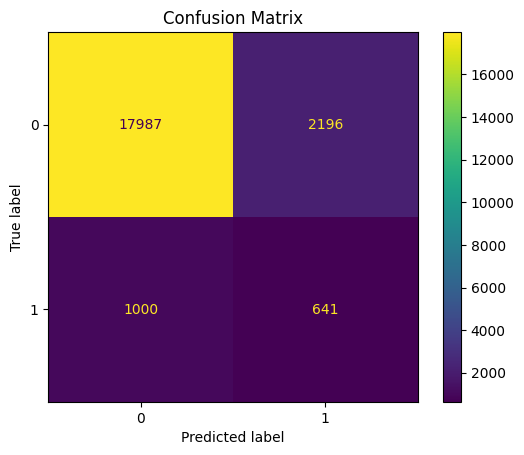

In [37]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
